### import required library

In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

#### Read data and show info

In [11]:
data_1 = pd.read_csv("../Data/fruits_all/1_fruitRef.csv")
data_1.head()

,fruit,diameter,weight
0,Apple,6.600522,121.717213
1,Apple,7.180725,132.704194
2,Apple,7.455163,163.325392
3,Cherry,1.540010,65.760731
4,Cherry,2.528784,75.025461


In [12]:
data_1.tail()

,fruit,diameter,weight
95,Apple,7.196971,124.924348
96,Cherry,2.298186,71.513458
97,Apple,6.828546,126.576360
98,Cherry,2.202153,83.210926
99,Cherry,1.657491,64.037790


In [13]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     100 non-null    object 
 1   diameter  100 non-null    float64
 2   weight    100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [14]:
data_1.describe()

,diameter,weight
count,100.000000,100.000000
mean,4.500798,111.672586
std,2.560014,42.153182
min,0.886082,45.761632
25%,2.019855,74.268918
50%,4.460922,103.047634
75%,7.070777,153.517839
max,7.971300,184.298411


In [15]:
data_1.isna().sum()

fruit       0
diameter    0
weight      0
dtype: int64

#### Explore data

<Axes: >

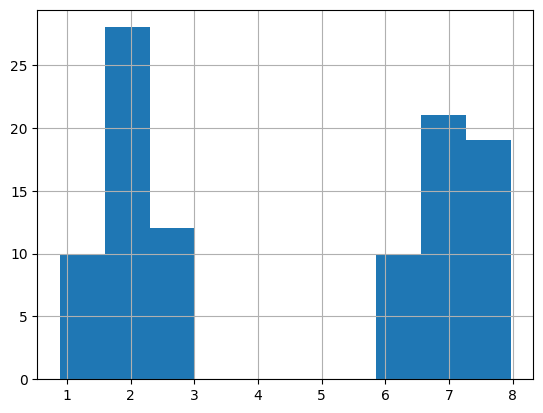

In [16]:
data_1.diameter.hist()

<Axes: >

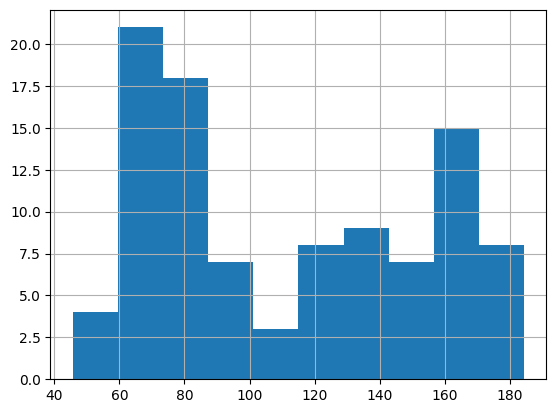

In [17]:
data_1.weight.hist()

<Axes: xlabel='diameter', ylabel='weight'>

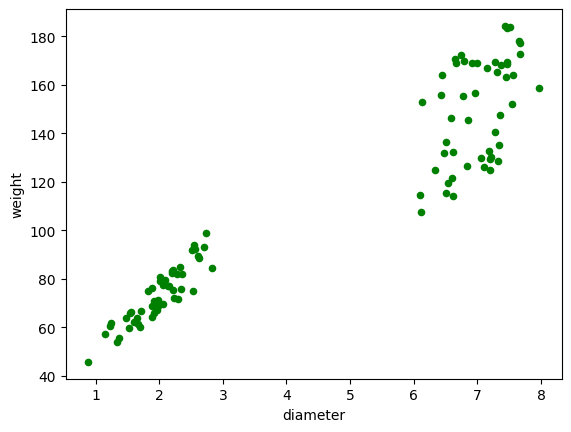

In [18]:
data_1.plot(kind="scatter", x="diameter", y="weight", color="green")

#### Clustering 

In [19]:
cluster1 = KMeans(n_clusters=2).fit(data_1[["weight", "diameter"]])
pred_labels_1 = cluster1.predict(data_1[["weight", "diameter"]])
print(pred_labels_1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0]


### Add column to data

In [20]:
data_1["cluster"] = pred_labels_1

data_1.head()

,fruit,diameter,weight,cluster
0,Apple,6.600522,121.717213,1
1,Apple,7.180725,132.704194,1
2,Apple,7.455163,163.325392,1
3,Cherry,1.540010,65.760731,0
4,Cherry,2.528784,75.025461,0


#### Display result

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

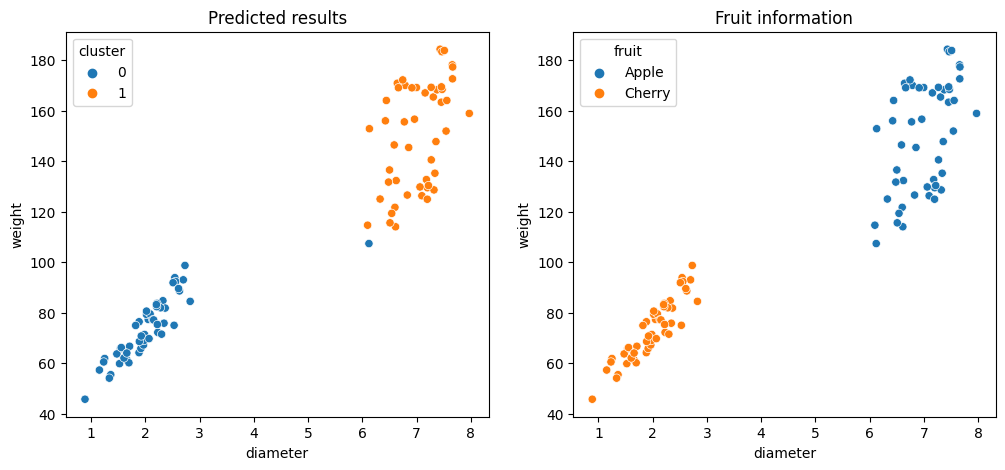

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(data=data_1, x="diameter", y="weight", hue="cluster")
plt.title("Predicted results")
plt.subplot(122)
sns.scatterplot(data=data_1, x="diameter", y="weight", hue="fruit")
plt.title("Fruit information")
plt.show()

### Limits of Kmeans

#### Read data: 2_fruitDense and do the same

In [23]:
data_dense = pd.read_csv("../Data/fruits_all/2_fruitDense.csv")
data_dense.head()

,fruit,diameter,weight
0,Apple,7.363885,141.541817
1,Apple,6.608892,143.229432
2,Apple,7.073370,167.295518
3,Apple,6.950858,154.942545
4,Apple,7.247590,130.187309


In [24]:
data_dense.tail()

,fruit,diameter,weight
10045,Apple,6.571942,155.733467
10046,Apple,6.997188,169.632256
10047,Apple,7.208078,174.676053
10048,Apple,6.252150,123.487570
10049,Apple,6.570121,126.942840


In [25]:
data_dense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     10050 non-null  object 
 1   diameter  10050 non-null  float64
 2   weight    10050 non-null  float64
dtypes: float64(2), object(1)
memory usage: 235.7+ KB


In [26]:
data_dense.describe()

,diameter,weight
count,10050.000000,10050.000000
mean,6.978577,149.868244
std,0.609339,21.079546
min,0.908926,45.999145
25%,6.662570,134.702105
50%,6.997803,149.353382
75%,7.331728,164.983346
max,8.795541,214.738743


#### Explore data

<Axes: >

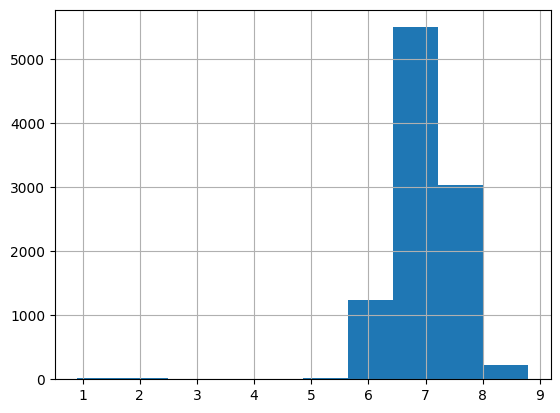

In [27]:
data_dense.diameter.hist()

<Axes: >

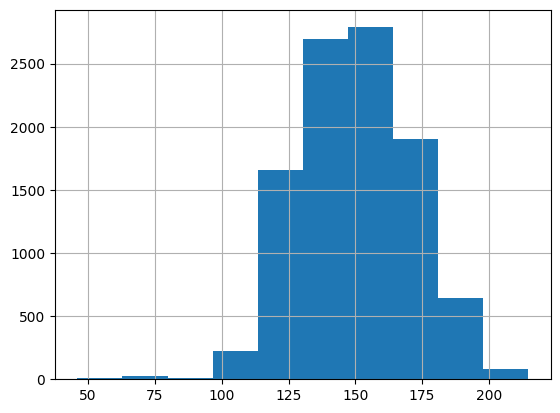

In [28]:
data_dense.weight.hist()

<Axes: xlabel='diameter', ylabel='weight'>

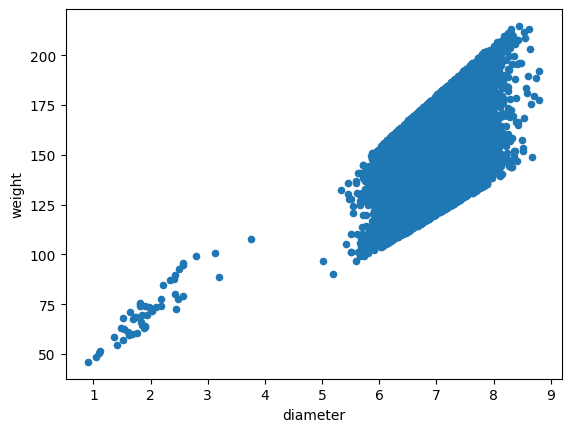

In [29]:
data_dense.plot(kind="scatter", x="diameter", y="weight")

### Clustering using Kmeans

In [31]:
cluster_dense = KMeans(n_clusters=2).fit(data_dense[["weight", "diameter"]])
pred_labels_dense = cluster_dense.predict(data_dense[["weight", "diameter"]])
pred_labels_dense

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [32]:
data_dense_1 = data_dense.copy()
data_dense_1["cluster"] = pred_labels_dense
data_dense_1.head()

,fruit,diameter,weight,cluster
0,Apple,7.363885,141.541817,1
1,Apple,6.608892,143.229432,1
2,Apple,7.073370,167.295518,0
3,Apple,6.950858,154.942545,0
4,Apple,7.247590,130.187309,1


#### Display result 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'fruit information')

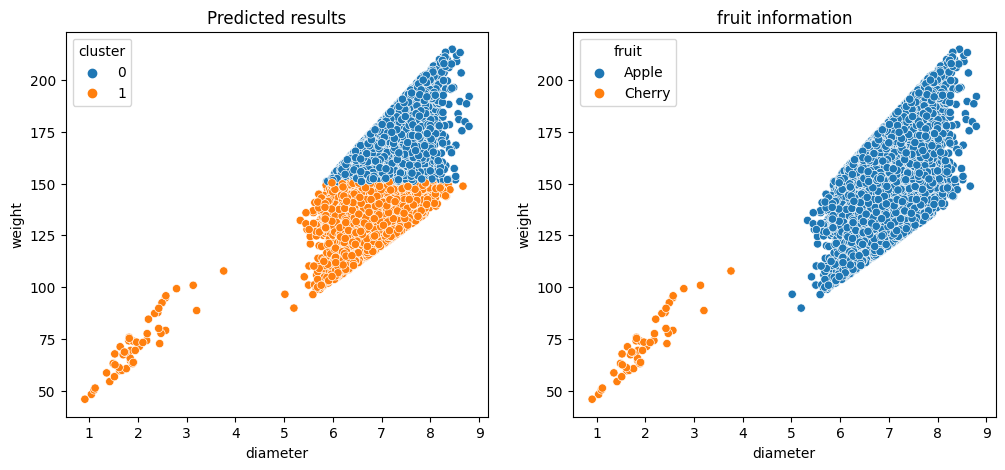

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(data=data_dense_1, x ="diameter", y="weight", hue="cluster")
plt.title("Predicted results")
plt.subplot(122)
sns.scatterplot(data=data_dense_1, x="diameter", y="weight", hue="fruit")
plt.title("fruit information")

#### Normalization data 

In [41]:
x_dense = data_dense[["diameter", "weight"]].values  # returns a numpy array
x_dense

array([[  7.36388457, 141.54181654],
       [  6.60889217, 143.22943231],
       [  7.07336957, 167.29551842],
       ...,
       [  7.20807768, 174.67605313],
       [  6.25215006, 123.48757008],
       [  6.57012062, 126.94284041]])

In [51]:
max_min_scaler = preprocessing.MinMaxScaler()
x_scaler = max_min_scaler.fit_transform(x_dense)
data_dense_nomalized = pd.DataFrame(x_scaler, columns=["diameter", "weight"])

In [52]:
data_dense_nomalized["fruit"] = data_dense.fruit
data_dense_nomalized.head()

,diameter,weight,fruit
0,0.818470,0.566214,Apple
1,0.722739,0.576215,Apple
2,0.781634,0.718838,Apple
3,0.766100,0.645630,Apple
4,0.803724,0.498924,Apple


#### Clustering using KMeans with nomalized data 

In [53]:
cluster_dense_normalized = KMeans(n_clusters=2).fit(data_dense_nomalized[["weight", "diameter"]])
pred_labels_dense_normalized = cluster_dense_normalized.predict(data_dense_nomalized[["weight", "diameter"]])
print(pred_labels_dense_normalized)

[0 0 1 ... 1 0 0]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
data_dense_nomalized["cluster"] = pred_labels_dense_normalized
data_dense_nomalized.head()

,diameter,weight,fruit,cluster
0,0.818470,0.566214,Apple,0
1,0.722739,0.576215,Apple,0
2,0.781634,0.718838,Apple,1
3,0.766100,0.645630,Apple,1
4,0.803724,0.498924,Apple,0


#### Display result after nomalized

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'fruit information')

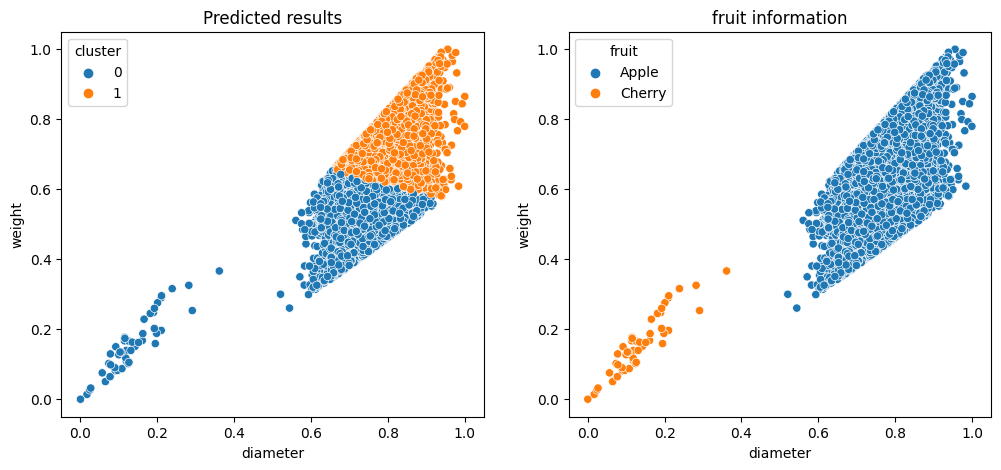

In [57]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(data=data_dense_nomalized, x="diameter", y="weight", hue="cluster")
plt.title("Predicted results")
plt.subplot(122)
sns.scatterplot(data=data_dense_nomalized, x="diameter", y="weight", hue="fruit")
plt.title("fruit information")

### Clustering with fruitPassion data

In [58]:
data_passion = pd.read_csv("../Data/fruits_all/3-fruitPassion.csv")
data_passion.head()

,fruit,diameter,weight
0,PassionFruit,1.900161,0.013376
1,PassionFruit,1.701292,0.010051
2,PassionFruit,5.215641,0.041504
3,Apple,7.050542,0.175540
4,Apple,8.087212,0.148929


#### Clustering with Kmeans 

In [59]:
cluster_passion = KMeans(n_clusters=2).fit_predict(data_passion[["weight", "diameter"]])
cluster_passion

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

In [60]:
data_passion["cluster"] = cluster_passion

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'fruit information')

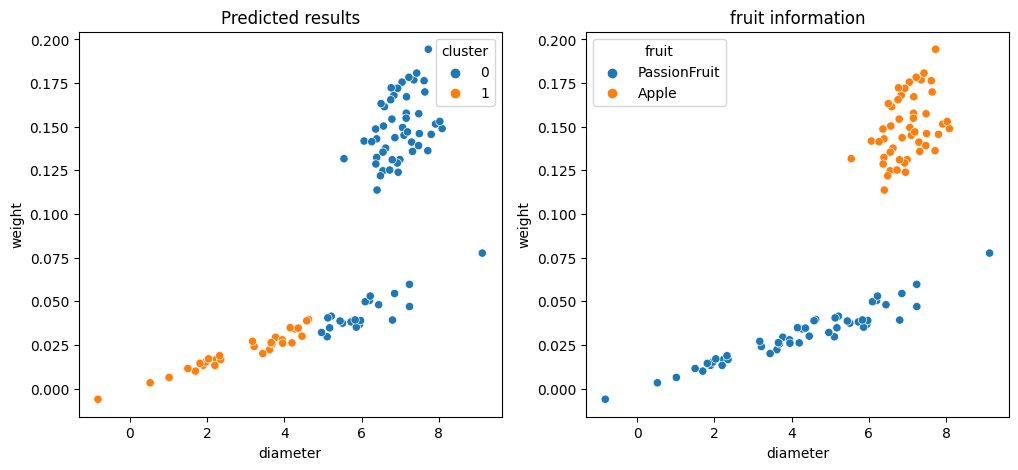

In [61]:
### Display 
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(data=data_passion, x="diameter", y="weight", hue="cluster")
plt.title("Predicted results")
plt.subplot(122)
sns.scatterplot(data=data_passion, x="diameter", y="weight", hue="fruit")
plt.title("fruit information")